<a href="https://colab.research.google.com/github/IEXE-Tec/analisis-descriptivo/blob/master/06_correlaciones_y_uso_de_visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# Importo las librerias que usare en este notebook
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


# Covarianza

En este notebook encontraras el codigo usando en clase. Te recomendamos jugar con el para entender mejor como funciona la covarianza y correlacion.

Generaremos una serie de variables apartir de diferentes distribuciones y ver que ocurre con nuestros estadisticos. 

Te recomendamos agregar visualizaciones para entender mejor lo que esta ocurriendo.


Observaras que modelamos el proceso generador de datos a traves de funciones del estilo:  
y = x + z  
y = f(x)

En la realidad es raro que observemos estas funciones, pues es lo que estamos tratando de estimar apartir de los datos. Sin embargo, visualizar el problema de esta forma nos ayudara a entenderlo mejor.

### Cov(x,x)

In [92]:
# X
x = np.random.normal(0, 1, 1000)
print('Covarianza entre X y X: ')
print(np.cov(x,x))
print(np.var(x))

Covarianza entre X y X: 
[[0.97116832 0.97116832]
 [0.97116832 0.97116832]]
0.9701971492178779


Nota como existe una pequena diferencia entre el valor calculado por los dos metodos {cov,var}. Cual crees que sea la razon? (Hint: Recuerda la correccion por sesgo) La respuesta esta en la celda de abajo.


In [93]:
# X
x = np.random.normal(0, 1, 1000)
print('Covarianza entre X y X: ')
# 
print(np.cov(x,x)*(1000-1)/1000)
print(np.var(x))

Covarianza entre X y X: 
[[0.98835832 0.98835832]
 [0.98835832 0.98835832]]
0.9883583237375921


Para efectos practicos esta correcion por sesgo no es tan importante, a menos que se tengan pocos datos. Es bueno tomarlo, en cuenta.

In [94]:
# X
x = np.random.normal(100, 10, 1000)
print('Covarianza entre X y X: ')
print(np.cov(x,x))
print(np.var(x))

Covarianza entre X y X: 
[[97.88108646 97.88108646]
 [97.88108646 97.88108646]]
97.78320537341531


### Cov(x,-x)




In [95]:
# X
x = np.random.normal(0, 1, 1000)
print('Covarianza entre X y X: ')
print(np.cov(x,-x))


Covarianza entre X y X: 
[[ 1.05366771 -1.05366771]
 [-1.05366771  1.05366771]]


### Covarianza entre x,y, z

In [96]:
# Variables que definen a Y
x = np.random.normal(0, 1, 1000)
z = np.random.normal(100, 10, 1000)

# Y
y = z**x

print('Covarianza entre Y & X: ')
print(np.cov(x,y))
print('-------------------')
print('Covarianza entre Y & Z: ')
print(np.cov(x,y))



Covarianza entre Y & X: 
[[1.07076309e+00 3.96778019e+04]
 [3.96778019e+04 4.57065976e+10]]
-------------------
Covarianza entre Y & Z: 
[[1.07076309e+00 3.96778019e+04]
 [3.96778019e+04 4.57065976e+10]]


In [97]:
# Variables que definen a Y
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 4, 1000)

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2
})
print('Covariance')
print(df.cov())
print('\n Correlation')
df.corr()

Covariance
          x1         x2
x1  0.949755   0.241847
x2  0.241847  15.381740

 Correlation


,x1,x2
x1,1.000000,0.063275
x2,0.063275,1.000000


In [98]:
x1 = np.random.normal(0, 1, 1000)
x2 = -1.0*x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
})

df.corr()


,x1,x2
x1,1.0,-1.0
x2,-1.0,1.0


In [99]:
x1 = np.random.normal(0, 1, 1000)
x2 = 3*x1
x3 = 1.0/x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

df.corr()

,x1,x2,x3
x1,1.000000,1.000000,0.006081
x2,1.000000,1.000000,0.006081
x3,0.006081,0.006081,1.000000


### No linealidad

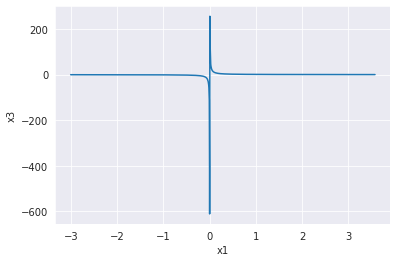

In [100]:
  
x1 = np.random.normal(0, 1, 1000)
x2 = 3*x1 
x3 = 1.0/x1 

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

sns.lineplot(x="x1", y="x3", data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


,x1,x2,x3
x1,1.000000,-0.065175,0.057384
x2,-0.065175,1.000000,0.016182
x3,0.057384,0.016182,1.000000


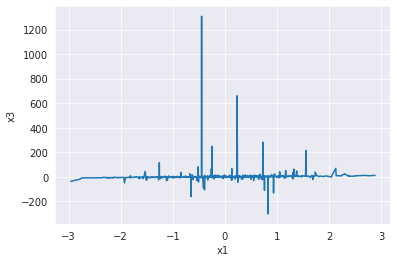

In [101]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = 3*x1 + 1.0/x2 

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

print(sns.lineplot(x="x1", y="x3", data=df))
df.corr()



AxesSubplot(0.125,0.125;0.775x0.755)


,x1,x2,x3
x1,1.000000,0.030438,0.999945
x2,0.030438,1.000000,0.040932
x3,0.999945,0.040932,1.000000


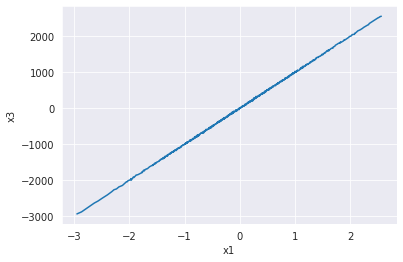

In [102]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = 1000*x1 + 10*(x2)

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

print(sns.lineplot(x="x1", y="x3", data=df))
df.corr()



AxesSubplot(0.125,0.125;0.775x0.755)


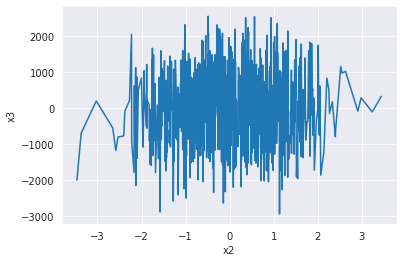

In [103]:
print(sns.lineplot(x="x2", y="x3", data=df))

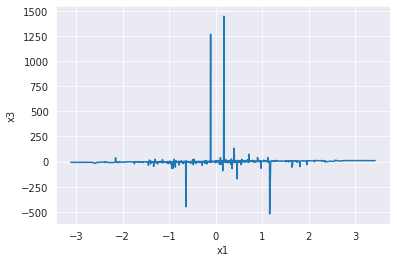

In [104]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = 3*x1 + 1.0/x2 

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

sns.lineplot(x="x1", y="x3", data=df)

In [105]:
# Correlaciones en relaciones no lineales
x1 = np.random.normal(0, 1, 1000)
x2 = -1.0/x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
})

df.corr()

,x1,x2
x1,1.000000,-0.038364
x2,-0.038364,1.000000


### Correlacion y Covarianza

Piensa cual es mas facil de interpretar!

In [106]:
# Variables que definen a Y
x = np.random.normal(0, 1, 1000)
z = np.random.normal(100, 10, 1000)

# Y
y = z**x

print('Covarianza entre X & Y: ')
print(np.cov(x,y))
print('-------------------------------')
print('Correlacion entre X & Y:')
print(np.corrcoef(x,y))


Covarianza entre X & Y: 
[[1.03914715e+00 1.07473460e+06]
 [1.07473460e+06 6.86058060e+13]]
-------------------------------
Correlacion entre X & Y:
[[1.         0.12728648]
 [0.12728648 1.        ]]


In [107]:
# Variables que definen a Y
x = np.random.normal(0, 1, 1000)
z = np.random.normal(100, 10, 1000)

# Y
y = z*x

print('Covarianza entre X & Y: ')
print(np.cov(x,y))
print('\n Correlacion entre X & Y: ')
print( np.corrcoef(x,y))


Covarianza entre X & Y: 
[[9.84295052e-01 9.86577906e+01]
 [9.86577906e+01 1.00024373e+04]]

 Correlacion entre X & Y: 
[[1.         0.99429628]
 [0.99429628 1.        ]]


## Feature Engineering

In [121]:
x1 = np.random.normal(10,10,1000)

x2 = 1/x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
})

df.corr()

,x1,x2
x1,1.000000,0.046837
x2,0.046837,1.000000


In [122]:
df['x2_'] = np.log(df['x2'])

df.corr()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,x1,x2,x2_
x1,1.000000,0.046837,-0.870127
x2,0.046837,1.000000,0.611456
x2_,-0.870127,0.611456,1.000000


# Tarea

In [108]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [109]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [110]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [111]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Hmmmmmm....  
Tendemos mucho a usar estas funciones, talvez sea conveniente crear una funcion. Esto no solo nos ahorra tiempo, sino que nos ayudara a evitar errores, y a mejorar la "redaccion" de nuestro codigo.

In [112]:
def glimpse_df(df):
  print('Head:')
  print(df.head())
  print('\n Info: ')
  print(df.info())
  print('\n Describe:')
  print(df.describe())

In [113]:
glimpse_df(penguins)

Head:
  species     island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen              36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g   

In [114]:
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## Observa las correlaciones anteriores.  
Que relaciones hay entre cada una de las variables?  

## Correlaciones Categoricas y Ordinales

Que pasa si queremos obtener una correlacion con variables ordinales?

In [117]:
penguins.replace({'MALE':0, 'FEMALE':1, np.nan:2}).corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,0.080732,0.755716,0.664478,-0.388500
culmen_depth_mm,0.080732,1.000000,0.028718,-0.190377,-0.395065
flipper_length_mm,0.755716,0.028718,1.000000,0.822006,-0.302983
body_mass_g,0.664478,-0.190377,0.822006,1.000000,-0.434375
sex,-0.388500,-0.395065,-0.302983,-0.434375,1.000000


Observemos que pasa si utilizamos otra codificacion/encoding valido para nuestra viariable categorica.


In [118]:
penguins.replace({'MALE':2, 'FEMALE':1, np.nan:0}).corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,0.122394,0.763654,0.665226,0.388487
culmen_depth_mm,0.122394,1.000000,0.078684,-0.159841,0.394433
flipper_length_mm,0.763654,0.078684,1.000000,0.820371,0.302811
body_mass_g,0.665226,-0.159841,0.820371,1.000000,0.434382
sex,0.388487,0.394433,0.302811,0.434382,1.000000


In [119]:
penguins.replace({'MALE':-1000, 'FEMALE':1, np.nan:1000}).corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,0.996409,0.982735,-0.248353,0.173743
culmen_depth_mm,0.996409,1.000000,0.970674,-0.303388,0.190126
flipper_length_mm,0.982735,0.970674,1.000000,-0.097032,0.142277
body_mass_g,-0.248353,-0.303388,-0.097032,1.000000,-0.429392
sex,0.173743,0.190126,0.142277,-0.429392,1.000000


Como podemos observar el coeficiente de correlacion cambia sustancialmente dependiendo de la codificacion que utilizemos.  

### Existira una medida de correlacion para variables categoricas/ordinales?

Como mencionamos anteriormente, la correlacion de Pearson es una de las tantas medidas o estadisticos que podemos utilizar para encontrar relaciones entre las variables.  

A continuacion te presentamos una tabla con los estadisticos sugeridos para cada caso:


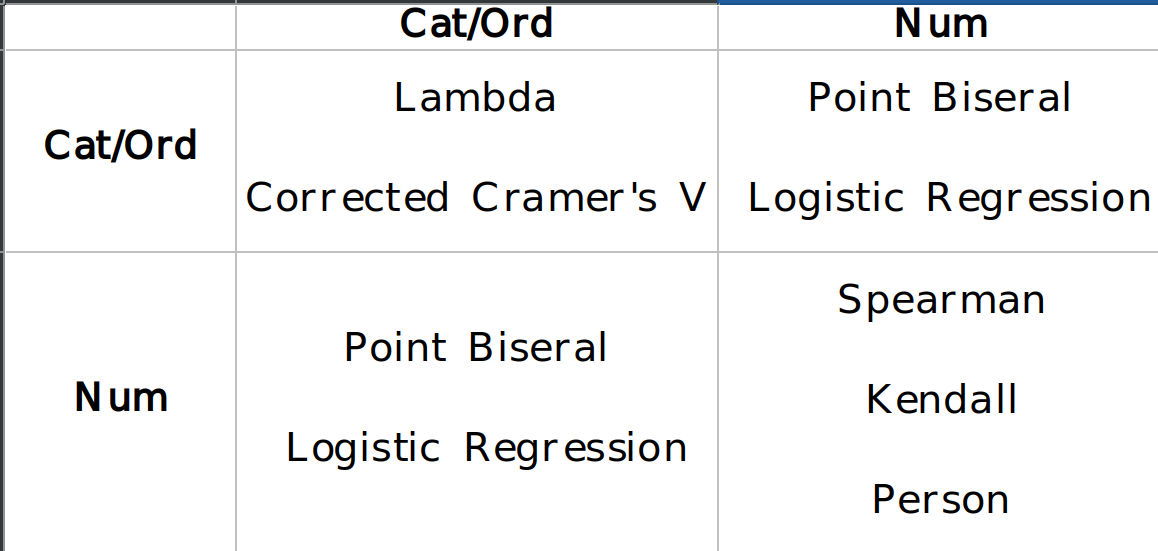

Te recomendamos revisar el post de Medium para conocer mas al respecto:

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365